<a href="https://colab.research.google.com/github/fredydo/Mini-Proyecto2/blob/main/MiniProyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Proyecto 2: Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Rasgos

Katherin Johana Henao - 1036953583

Jhon Fredy Mercado - 1020485282

**Tratamiento de Señales III**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

db = pickle.load(open("/content/drive/MyDrive/Señales III/Data/data.p", "rb"))

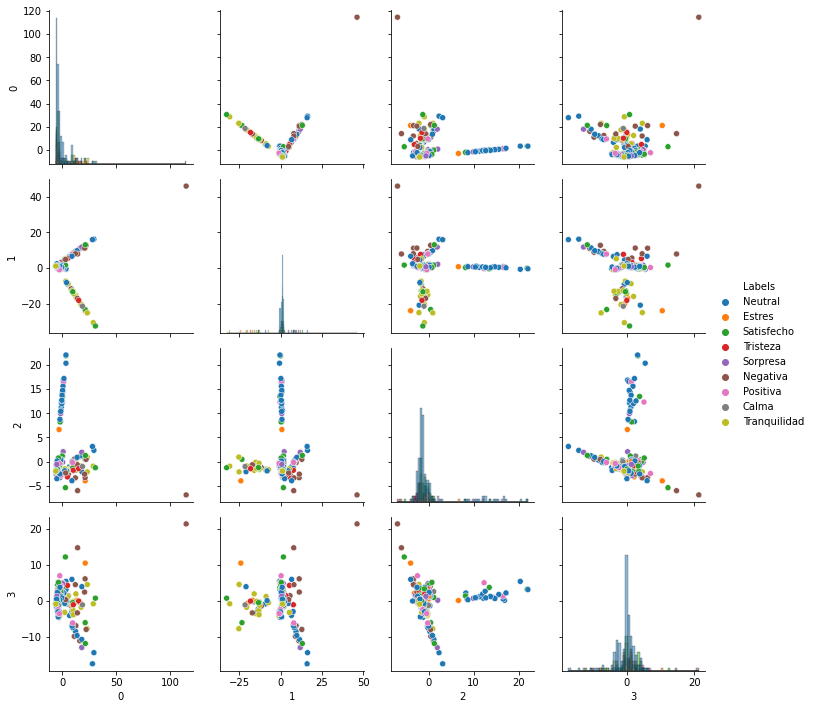

In [3]:
Y =  np.array(db['Labels'].values.tolist())
X =  db.drop(['Labels'],axis=1)
X = X.values
X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# Luego definimos el número de componentes y se crea el modelo PCA
pca = PCA(n_components=0.7)
pca.fit(X_train)
# Se transforman los datos al espacio latente

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Creamos el dataframe para seaborn
dataXpca = pd.DataFrame(X_train_pca)
labels  = db["Labels"]
dataXpca['Labels'] = y_train

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

g = sns.PairGrid(dataXpca, hue="Labels")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

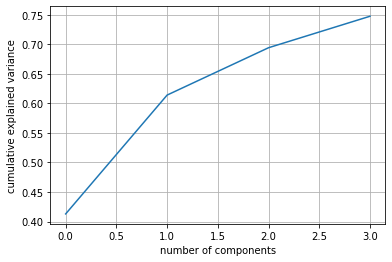

In [4]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

Podemos ver que para una desviasión del 70% fue suficiente con solo 3 componentes, y se puede observar que la emoción neutral es la que predomina ante las demás emociones y en las gráficas de seaborn podemos ver ciertas tendencias de esta emoción logrando discriminar esta emoción ante las otras emociones

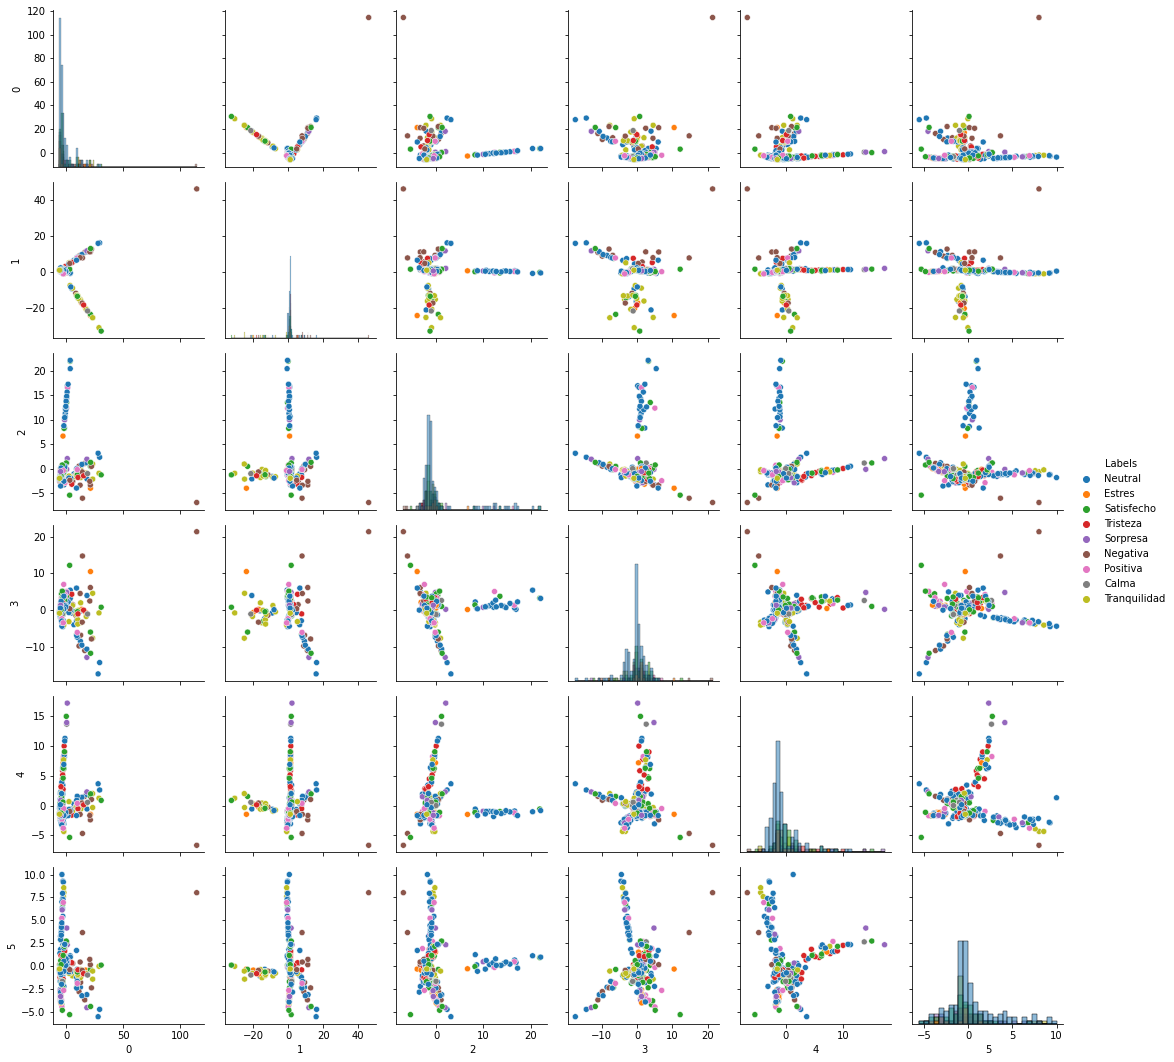

In [5]:
pca = PCA(n_components=0.8)
pca.fit(X_train)
# Se transforman los datos al espacio latente

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Creamos el dataframe para seaborn
dataXpca = pd.DataFrame(X_train_pca)
labels  = db["Labels"]
dataXpca['Labels'] = y_train

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

g = sns.PairGrid(dataXpca, hue="Labels")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

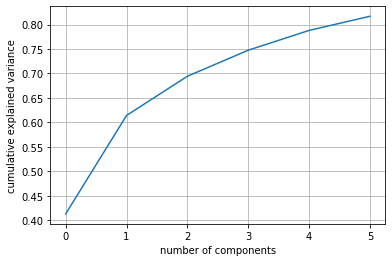

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

Podemos ver que para una desviasión del 80% fue suficiente con solo 5 componentes, acá hay unos patrones un poco más caóticos con los nuevos 2 componentes pero en algunas gráficas de seaborn también se logran percibir patrones en otras emociones, como es el caso de la emoción tristeza (Rojo) y Positiva (rosado) 

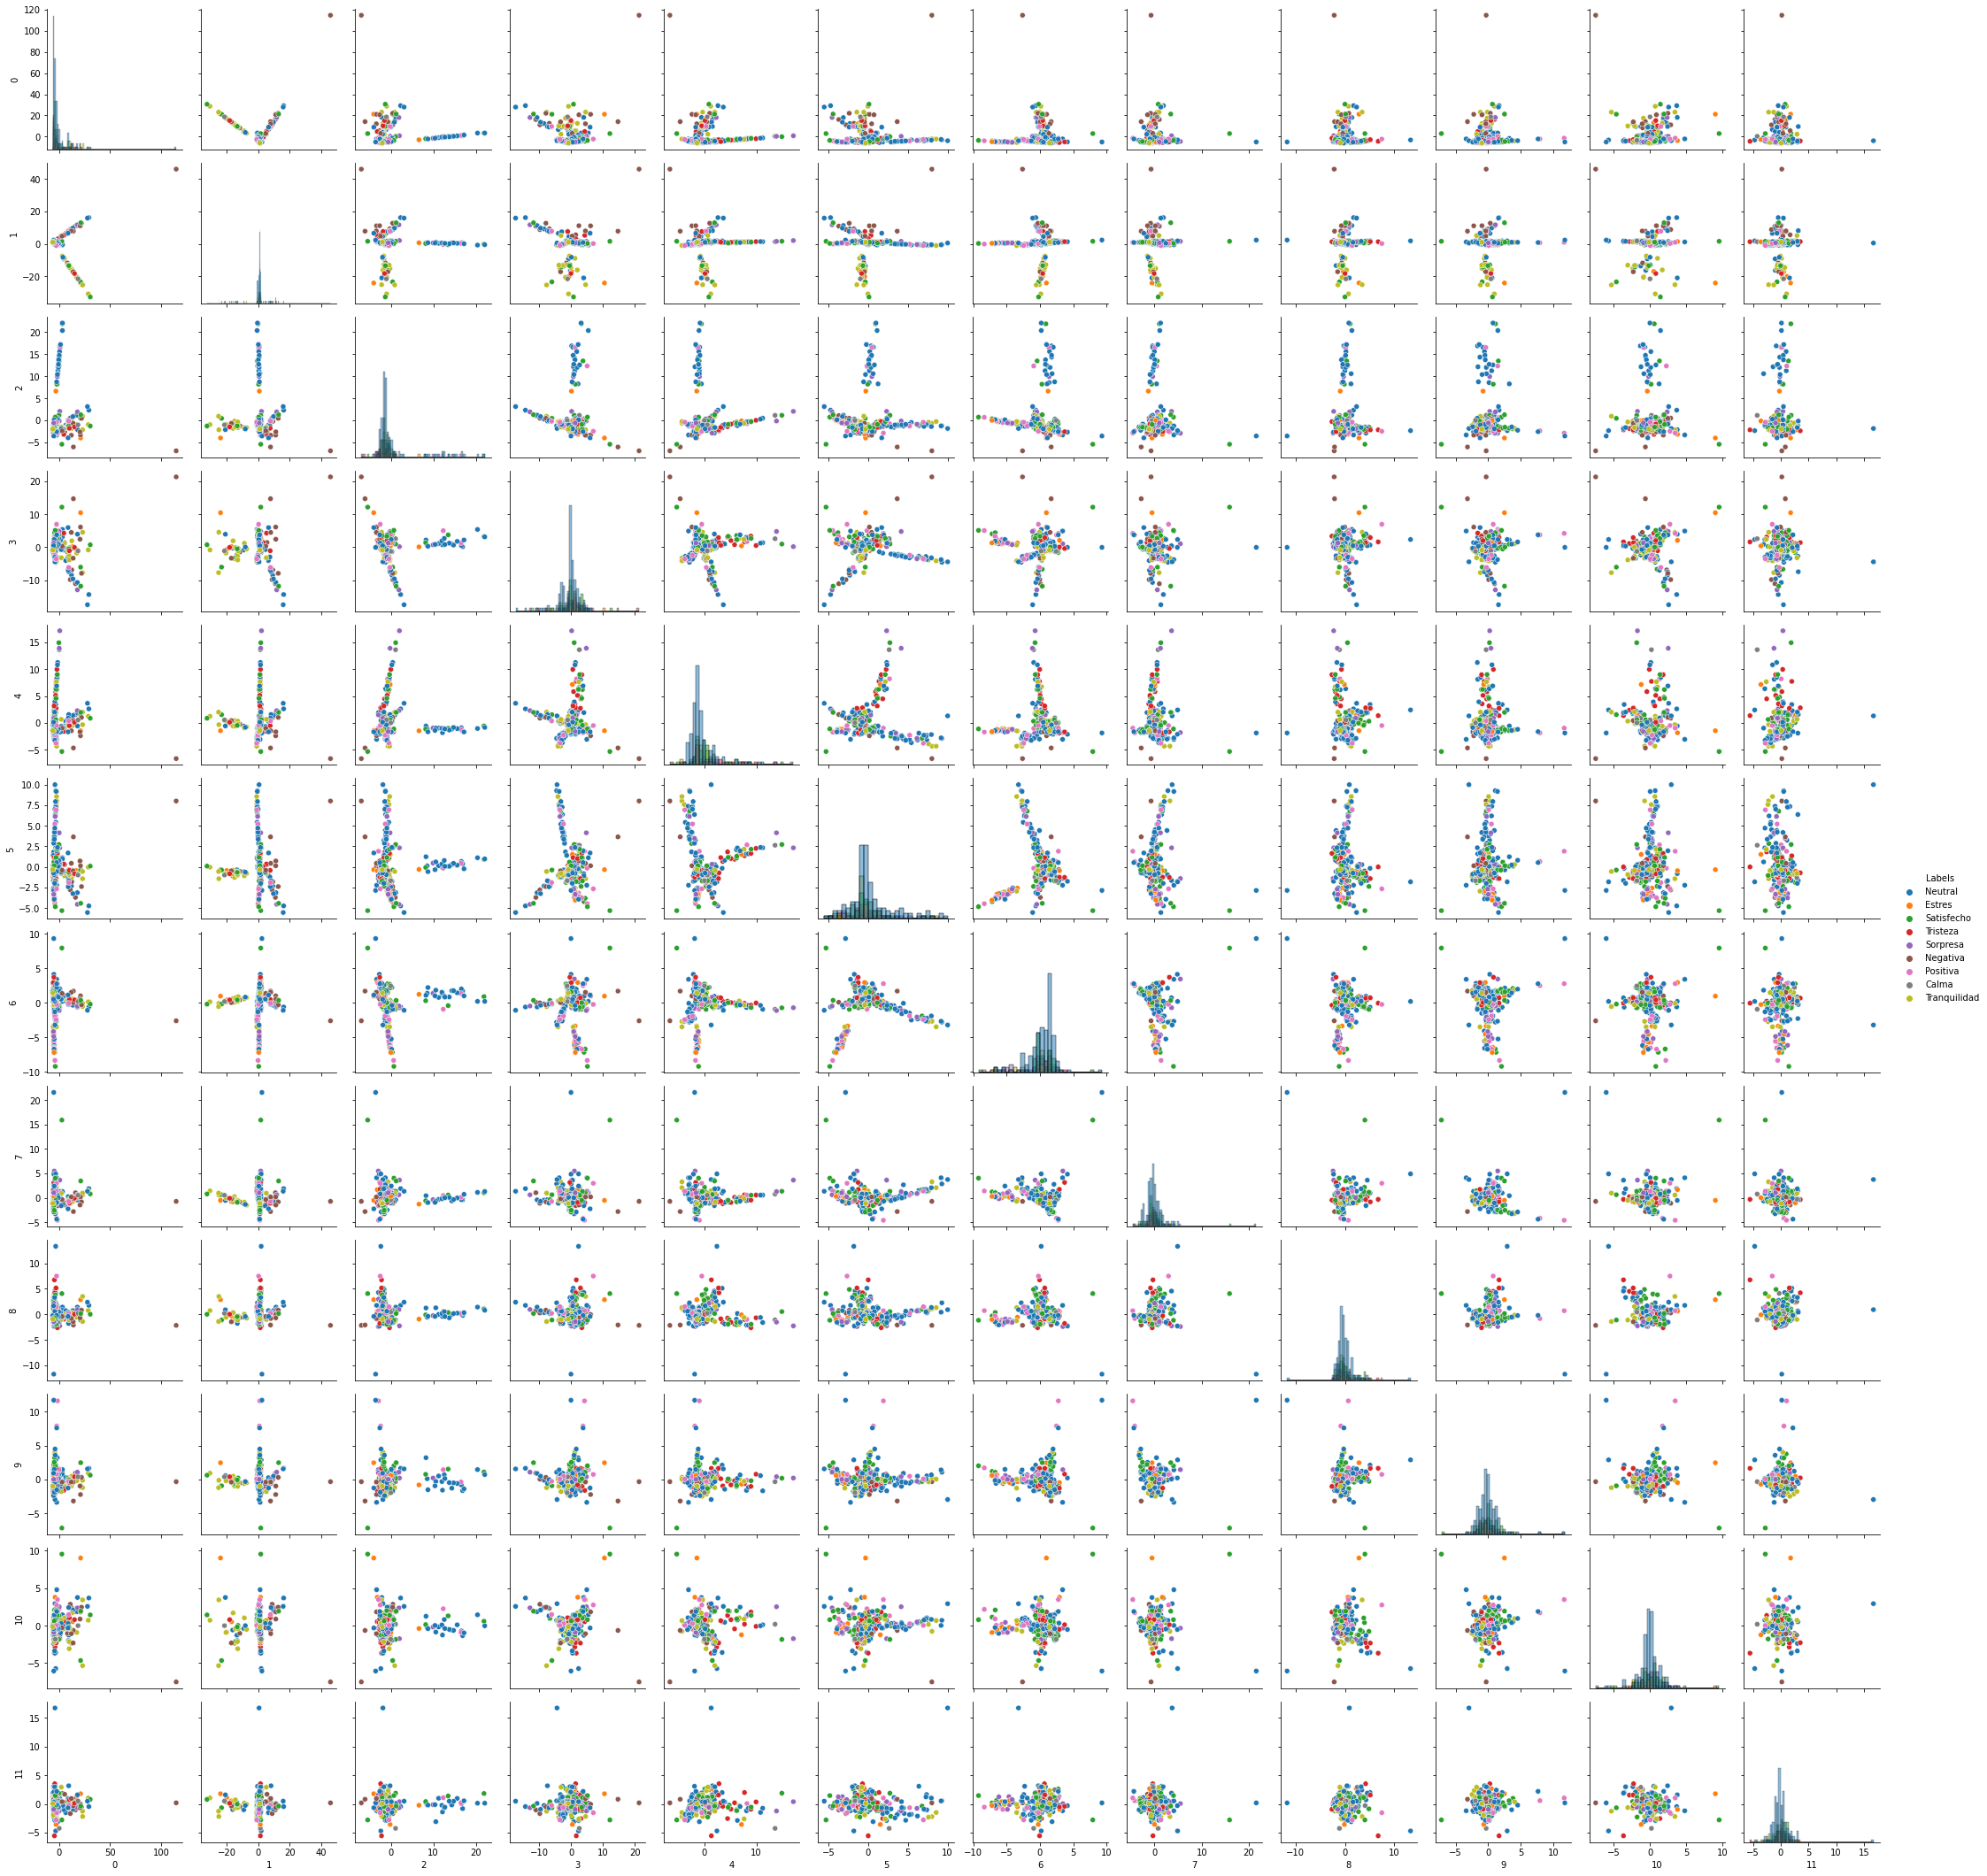

In [7]:
pca = PCA(n_components=0.9)
pca.fit(X_train)
# Se transforman los datos al espacio latente

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Creamos el dataframe para seaborn
dataXpca = pd.DataFrame(X_train_pca)
labels  = db["Labels"]
dataXpca['Labels'] = y_train

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

g = sns.PairGrid(dataXpca, hue="Labels")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

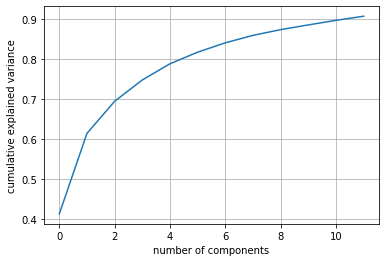

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

Para una desviación del 90% se logró con 12 componentes, con estas nuevas componentes se logran ver también ciertos patrones en otras emociones, como es en el satisfecho (verde) y el estres (naranja)

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Se crea el modelo (ej. clasificador)
model = GaussianNB()
# Se entrena el modelo
model.fit(X_train,y_train)
# Se realiza una predicción
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Calma       0.00      0.00      0.00         4
      Estres       0.00      0.00      0.00         6
    Negativa       0.30      0.75      0.43         4
     Neutral       0.00      0.00      0.00        40
    Positiva       0.03      0.20      0.06         5
  Satisfecho       0.00      0.00      0.00        18
    Sorpresa       0.06      0.60      0.11         5
Tranquilidad       0.10      0.12      0.11         8
    Tristeza       0.00      0.00      0.00        10

    accuracy                           0.08       100
   macro avg       0.06      0.19      0.08       100
weighted avg       0.02      0.08      0.03       100

[[ 0  0  0  0  1  0  1  2  0]
 [ 0  0  0  0  0  0  4  2  0]
 [ 0  0  3  0  0  0  1  0  0]
 [ 0  0  2  0 17  0 17  4  0]
 [ 0  0  2  0  1  0  1  0  1]
 [ 0  0  1  0  8  0  8  1  0]
 [ 0  0  0  0  1  0  3  0  1]
 [ 0  0  1  0  0  0  6  1  0]
 [ 0  0  1  0  2  0  7  0  0]]
              precision 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Desde un comienzo podemos observar que el espacio de entrada está sobre ajustado, ya que se cuenta con más etiquetas en la emocion netral que en el resto de emociones, podemos ver que el clasificador gaussiano solo se obtuvo un 8% de accuracy, mientras que con la regresión logística parece que este tipo de clasificador se ajusta mejor a este sistema, ya que se obtuvo un 37% de accuracy

In [11]:
pca = PCA(n_components=0.7)
pca.fit(X_train)
# Se transforman los datos al espacio latente

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = GaussianNB()
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model = LogisticRegression()
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Calma       0.00      0.00      0.00         4
      Estres       0.00      0.00      0.00         6
    Negativa       0.11      0.25      0.15         4
     Neutral       0.54      0.38      0.44        40
    Positiva       0.20      0.20      0.20         5
  Satisfecho       0.00      0.00      0.00        18
    Sorpresa       0.00      0.00      0.00         5
Tranquilidad       0.11      0.12      0.12         8
    Tristeza       0.10      0.50      0.17        10

    accuracy                           0.23       100
   macro avg       0.12      0.16      0.12       100
weighted avg       0.25      0.23      0.22       100

[[ 0  0  1  0  0  0  0  1  2]
 [ 0  0  1  1  0  0  0  1  3]
 [ 0  0  1  1  0  0  0  1  1]
 [ 0  0  2 15  2  0  0  4 17]
 [ 0  0  2  2  1  0  0  0  0]
 [ 0  0  1  3  1  0  0  1 12]
 [ 0  0  0  1  0  0  0  0  4]
 [ 0  0  0  2  0  0  0  1  5]
 [ 0  0  1  3  1  0  0  0  5]]
              precision 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Para el espacio latente con una desviación del 70% en el clasificador gaussiano se puede observar una gran mejora, pasando del 8% al 23% de accuracy y también hay una pequeña mejora respecto a la regresión logística, pasando del 37% al 39% de accuracy

In [13]:
pca = PCA(n_components=0.8)
pca.fit(X_train)
# Se transforman los datos al espacio latente

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = GaussianNB()
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model = LogisticRegression()
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Calma       0.00      0.00      0.00         4
      Estres       0.00      0.00      0.00         6
    Negativa       0.11      0.25      0.15         4
     Neutral       0.47      0.42      0.45        40
    Positiva       0.00      0.00      0.00         5
  Satisfecho       0.00      0.00      0.00        18
    Sorpresa       0.00      0.00      0.00         5
Tranquilidad       0.11      0.12      0.12         8
    Tristeza       0.10      0.40      0.16        10

    accuracy                           0.23       100
   macro avg       0.09      0.13      0.10       100
weighted avg       0.21      0.23      0.21       100

[[ 0  0  1  0  0  0  0  1  2]
 [ 0  0  1  3  0  0  0  1  1]
 [ 0  0  1  1  0  0  0  1  1]
 [ 0  0  2 17  1  0  2  4 14]
 [ 0  0  2  2  0  0  1  0  0]
 [ 0  0  1  4  1  0  1  1 10]
 [ 0  0  0  3  0  0  0  0  2]
 [ 0  0  0  2  0  0  0  1  5]
 [ 0  0  1  4  1  0  0  0  4]]
              precision 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Para el espacio latente con una desviación del 80% en el clasificador gaussiano no hay diferencia alguna en el accuracy mientras que con la regresión logística esta disminuyó un 1% respecto al espacio latente con una desviación del 70% 

In [15]:
pca = PCA(n_components=0.9)
pca.fit(X_train)
# Se transforman los datos al espacio latente

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = GaussianNB()
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model = LogisticRegression()
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Calma       0.00      0.00      0.00         4
      Estres       1.00      0.17      0.29         6
    Negativa       0.22      0.50      0.31         4
     Neutral       0.55      0.28      0.37        40
    Positiva       0.00      0.00      0.00         5
  Satisfecho       0.00      0.00      0.00        18
    Sorpresa       0.17      0.40      0.24         5
Tranquilidad       0.13      0.25      0.17         8
    Tristeza       0.11      0.40      0.18        10

    accuracy                           0.22       100
   macro avg       0.24      0.22      0.17       100
weighted avg       0.32      0.22      0.22       100

[[ 0  0  1  1  0  0  0  1  1]
 [ 0  1  0  0  0  0  3  1  1]
 [ 0  0  2  0  0  0  0  0  2]
 [ 0  0  2 11  2  0  2  8 15]
 [ 0  0  2  1  0  1  0  1  0]
 [ 1  0  1  4  3  0  2  2  5]
 [ 0  0  0  1  0  1  2  0  1]
 [ 0  0  0  0  0  0  0  2  6]
 [ 0  0  1  2  0  0  3  0  4]]
              precision 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Para el espacio latente con una desviación del 90% el accuracy en el clasificador gaussiano disminuyó un 1% mientras que con el de regresión logística permaneció igual, respecto al espacio latente con una desviación del 80%



En general podemos observar que los mejores resultados se obtuvieron en el espacio latente, viendo que pasando de unas 259 características a solo unas 5 componentes nos ofrece un mejor rendimiento en el sistema y con un menor trabajo de cómputo

In [16]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=60)

In [17]:
lfw_people

{'DESCR': ".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones

Total dataset size:
n_samples: 1348
n_features: 2914
n_classes: 8

-----------------------------------------------------------------

Mejor estimador: 
GaussianNB(priors=None, var_smoothing=1e-14)
                   precision    recall  f1-score   support

     Ariel Sharon       0.54      0.37      0.44        19
     Colin Powell       0.76      0.70      0.73        56
  Donald Rumsfeld       0.62      0.62      0.62        29
    George W Bush       0.72      0.89      0.80       132
Gerhard Schroeder       0.50      0.50      0.50        24
      Hugo Chavez       0.60      0.32      0.41        19
Junichiro Koizumi       0.77      0.71      0.74        14
       Tony Blair       0.76      0.57      0.65        44

         accuracy                           0.70       337
        macro avg       0.66      0.58      0.61       337
     weighted avg       0.69      0.70      0.69       337

[[  7   1   4   6   0   0   0   1]
 [  3  39   1   9   1   0   0   3]
 [  2   0  18   7   1 

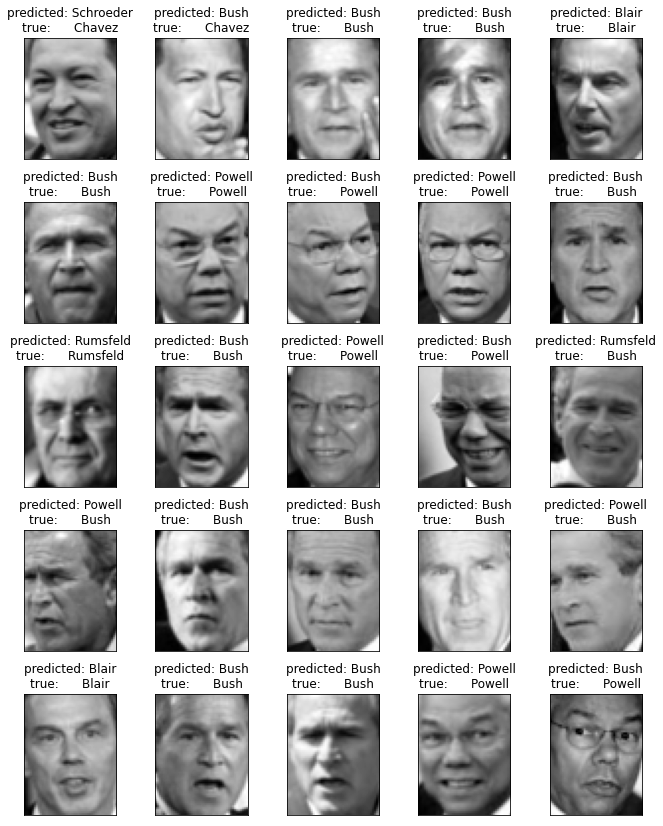

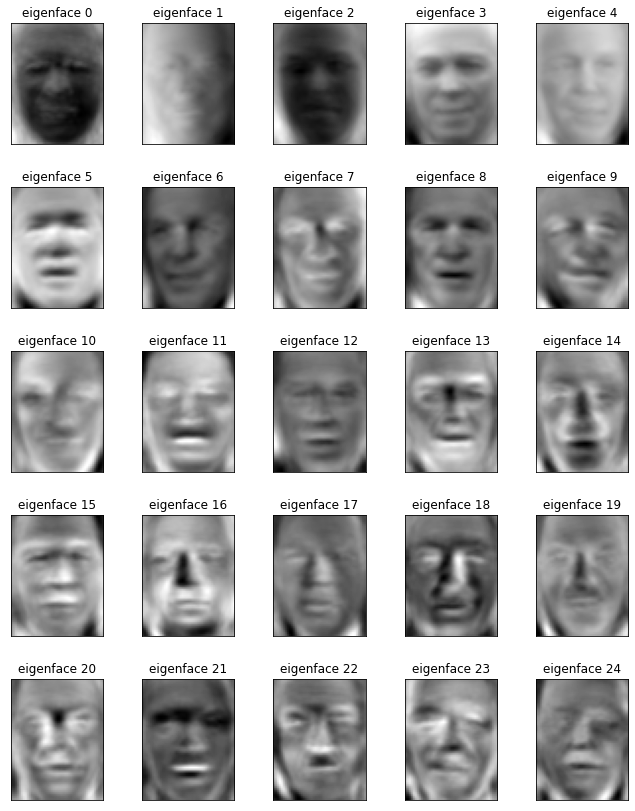

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER


-----------------------------------------------------------------

Mejor estimador: 
LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.42      0.47        19
     Colin Powell       0.74      0.77      0.75        56
  Donald Rumsfeld       0.67      0.69      0.68        29
    George W Bush       0.80      0.86      0.83       132
Gerhard Schroeder       0.50      0.58      0.54        24
      Hugo Chavez       0.56      0.53      0.54        19
Junichiro Koizumi       0.73      0.79      0.76        14
       Tony Blair       0.71      0.50      0.59        44

         accuracy                           0.72    

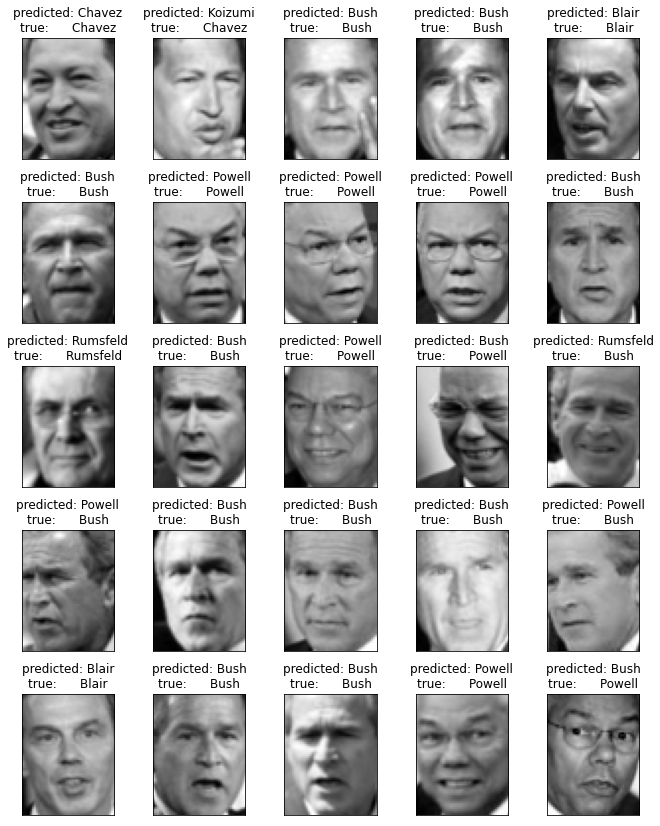

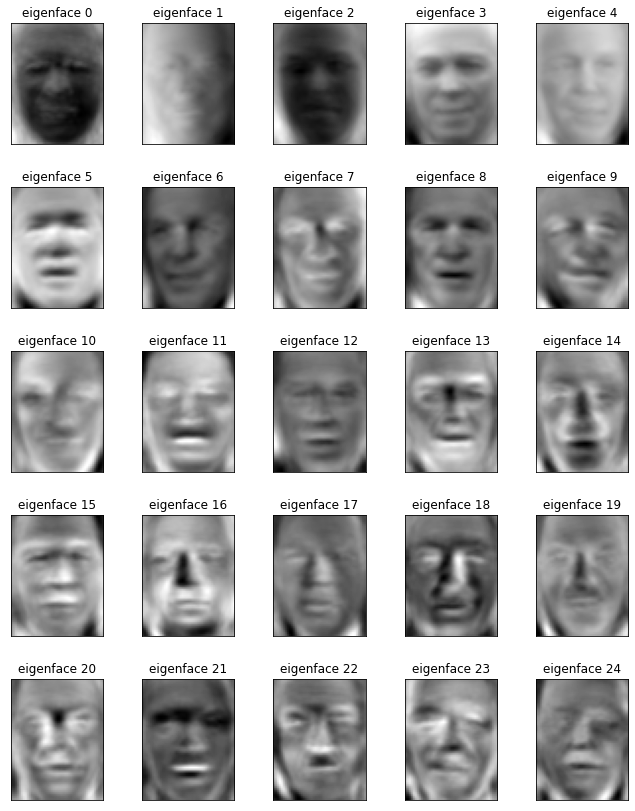

In [65]:
from sklearn.model_selection import GridSearchCV

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

n_components=30
pca = PCA(n_components=n_components).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'var_smoothing': [1e-14, 1e-13, 1e-12, 1e-11]}
model = GridSearchCV(GaussianNB(),param_grid).fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print()
print("-----------------------------------------------------------------")
print()
print("Mejor estimador: ")
print(model.best_estimator_)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w, n_row=5, n_col=5)


eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)
plt.show()

param_grid = {'penalty':['l1','l2'],'C': [1e3, 5e3, 1e4, 5e4]}
model = GridSearchCV(LogisticRegression(),param_grid).fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print()
print("-----------------------------------------------------------------")
print()
print("Mejor estimador: ")
print(model.best_estimator_)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))



prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w, n_row=5, n_col=5)


eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)
plt.show()

0.7909842


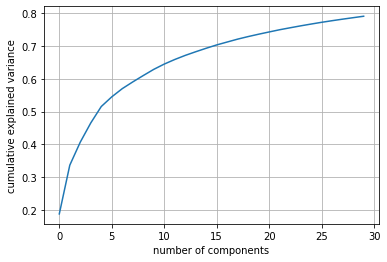

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.sum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

n_components=30, esta cantidad de componentes aportan el 80% de la desviación

**Gaussian:** GaussianNB(priors=None, var_smoothing=1e-14), con un **accuracy** de 70%

**LogisticRegresion:** LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), con un **accuracy** de 72%


-----------------------------------------------------------------

Mejor estimador: 
GaussianNB(priors=None, var_smoothing=1e-14)
                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.53      0.67        19
     Colin Powell       0.80      0.80      0.80        56
  Donald Rumsfeld       0.83      0.66      0.73        29
    George W Bush       0.76      0.92      0.83       132
Gerhard Schroeder       0.71      0.71      0.71        24
      Hugo Chavez       0.87      0.68      0.76        19
Junichiro Koizumi       1.00      0.93      0.96        14
       Tony Blair       0.89      0.70      0.78        44

         accuracy                           0.80       337
        macro avg       0.84      0.74      0.78       337
     weighted avg       0.81      0.80      0.79       337

[[ 10   2   0   5   1   0   0   1]
 [  0  45   1   9   0   0   0   1]
 [  1   0  19   7   1   0   0   1]
 [  0   6   2 121   1   1   0   1]
 [  0   2   1   3 

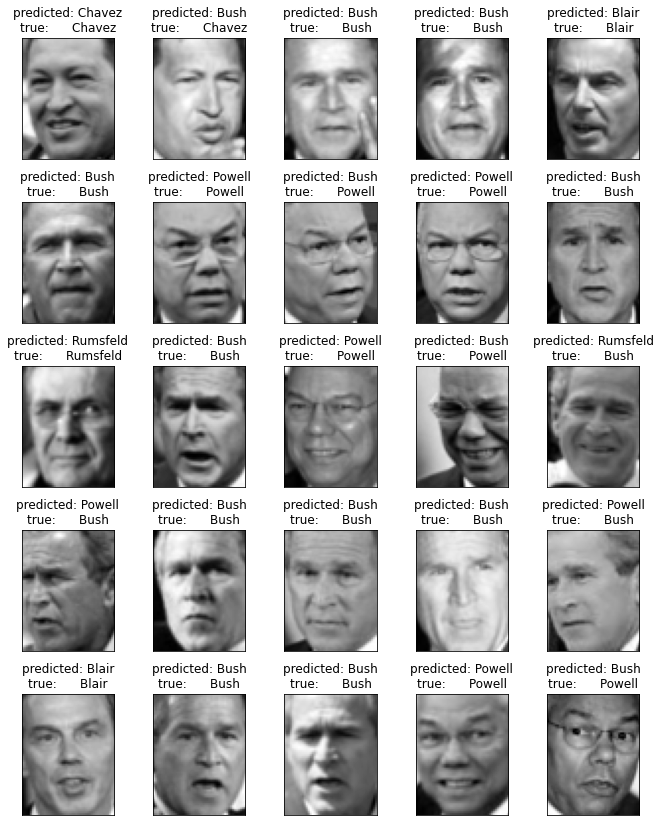

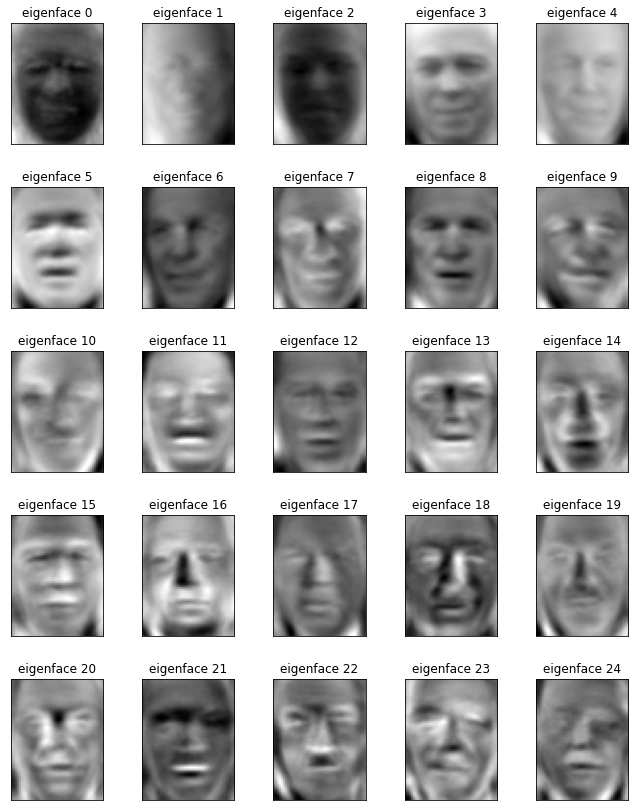

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER


-----------------------------------------------------------------

Mejor estimador: 
LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
                   precision    recall  f1-score   support

     Ariel Sharon       0.54      0.68      0.60        19
     Colin Powell       0.84      0.84      0.84        56
  Donald Rumsfeld       0.53      0.62      0.57        29
    George W Bush       0.91      0.76      0.83       132
Gerhard Schroeder       0.55      0.67      0.60        24
      Hugo Chavez       0.61      0.89      0.72        19
Junichiro Koizumi       0.78      1.00      0.88        14
       Tony Blair       0.76      0.66      0.71        44

         accuracy                           0.75    

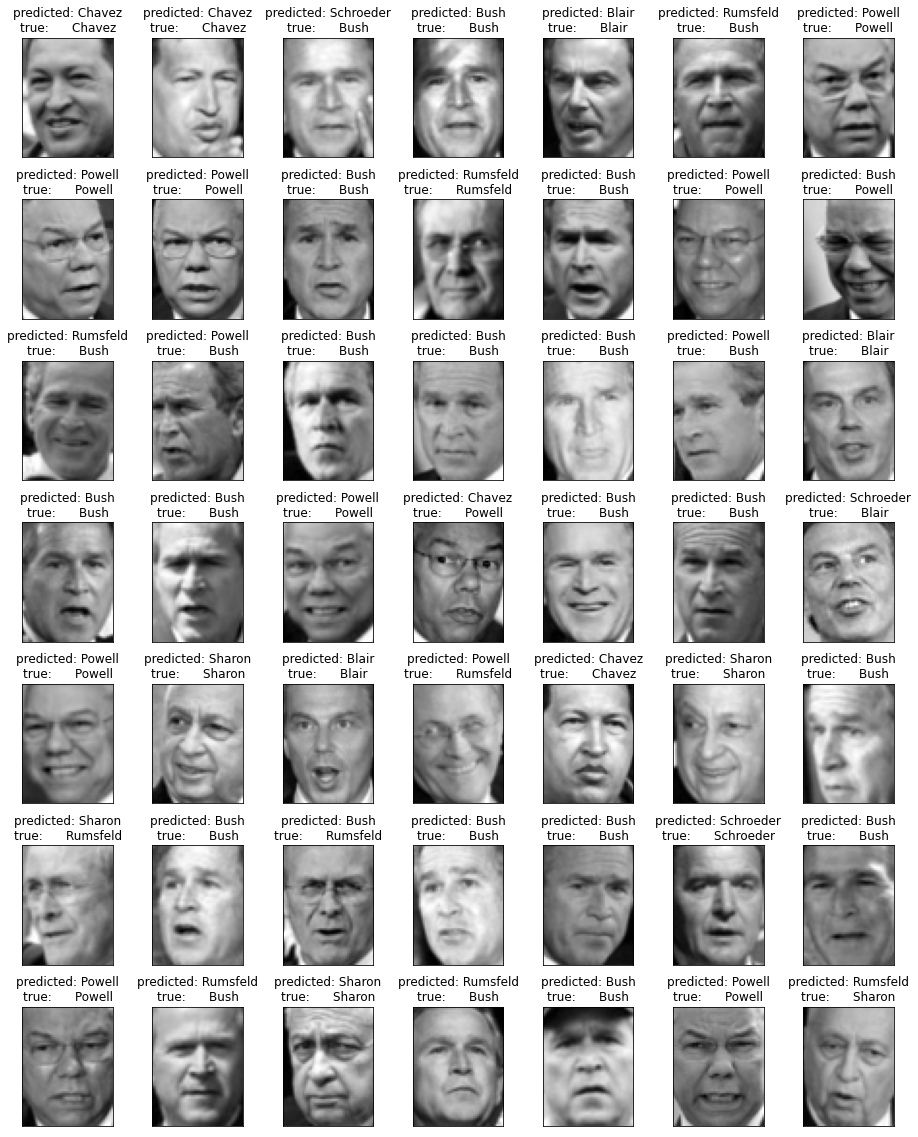

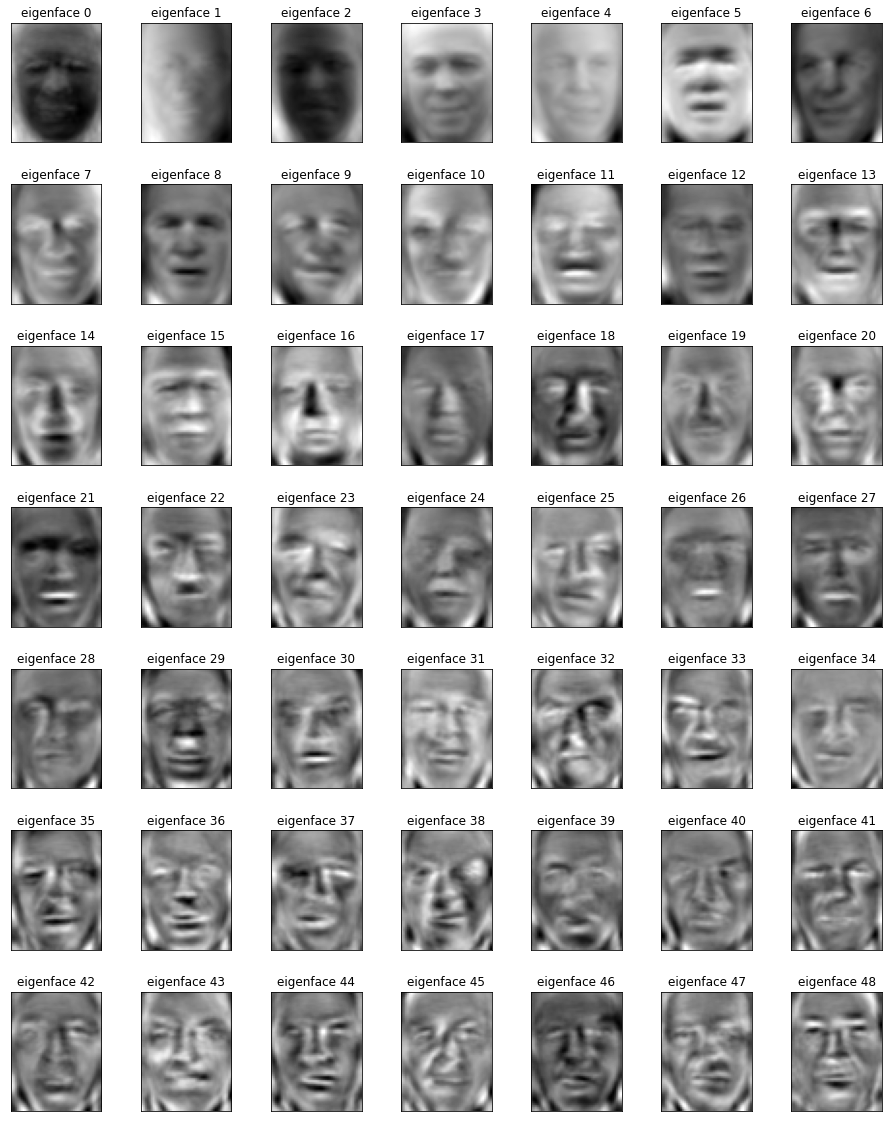

In [56]:
n_components=60
pca = PCA(n_components=n_components).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'var_smoothing': [1e-14, 1e-13, 1e-12, 1e-11]}
model = GridSearchCV(GaussianNB(),param_grid).fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print()
print("-----------------------------------------------------------------")
print()
print("Mejor estimador: ")
print(model.best_estimator_)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w, n_row=5, n_col=5)


eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)
plt.show()


param_grid = {'penalty':['l1','l2'],'C': [1e3, 5e3, 1e4, 5e4]}

model = GridSearchCV(LogisticRegression(),param_grid).fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print()
print("-----------------------------------------------------------------")
print()
print("Mejor estimador: ")
print(model.best_estimator_)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w, n_row=7, n_col=7)


eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=7, n_col=7)
plt.show()

0.8697695


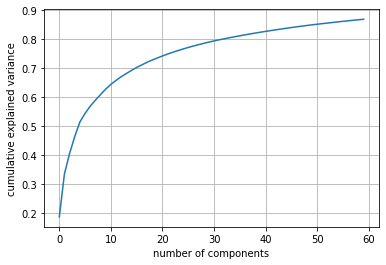

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.sum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

n_components=60, esta cantidad de componentes aportan el 87% de la desviación

**Gaussian:** GaussianNB(priors=None, var_smoothing=1e-14), con un **accuracy** de 80%

**LogisticRegresion:** LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), con un **accuracy** de 75%


-----------------------------------------------------------------

Mejor estimador: 
GaussianNB(priors=None, var_smoothing=1e-14)
                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.47      0.55        19
     Colin Powell       0.78      0.82      0.80        56
  Donald Rumsfeld       0.90      0.66      0.76        29
    George W Bush       0.74      0.89      0.80       132
Gerhard Schroeder       0.74      0.71      0.72        24
      Hugo Chavez       0.88      0.74      0.80        19
Junichiro Koizumi       0.92      0.79      0.85        14
       Tony Blair       0.91      0.68      0.78        44

         accuracy                           0.78       337
        macro avg       0.81      0.72      0.76       337
     weighted avg       0.79      0.78      0.78       337

[[  9   2   0   7   0   0   0   1]
 [  0  46   0  10   0   0   0   0]
 [  3   1  19   5   1   0   0   0]
 [  2   7   2 117   2   2   0   0]
 [  0   1   0   6 

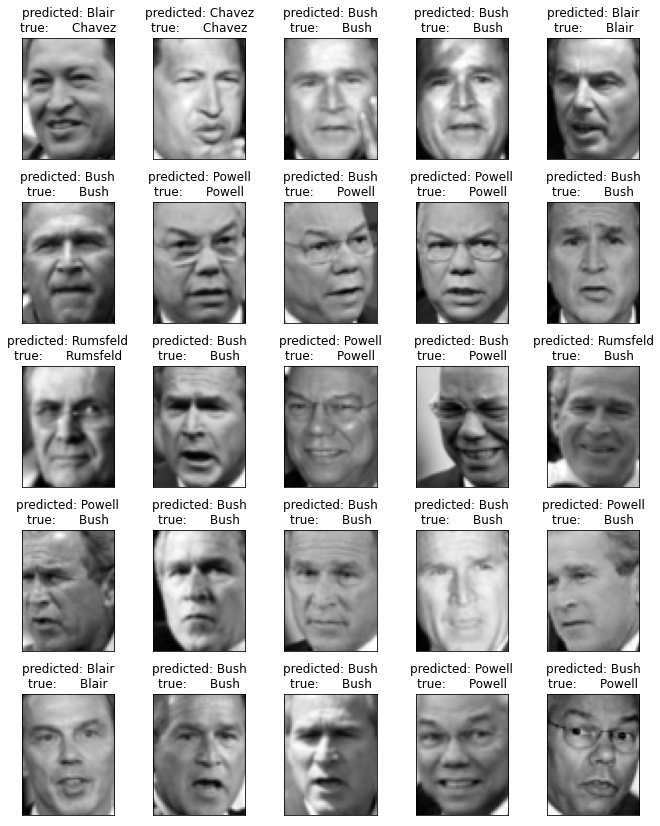

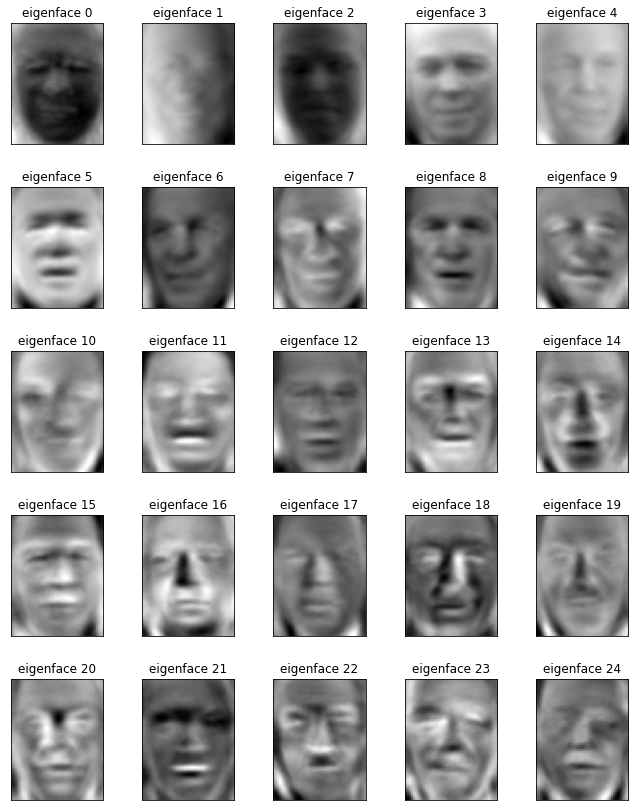

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER


-----------------------------------------------------------------

Mejor estimador: 
LogisticRegression(C=5000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.53      0.56        19
     Colin Powell       0.64      0.75      0.69        56
  Donald Rumsfeld       0.56      0.66      0.60        29
    George W Bush       0.89      0.77      0.83       132
Gerhard Schroeder       0.49      0.71      0.58        24
      Hugo Chavez       0.53      0.53      0.53        19
Junichiro Koizumi       0.65      0.79      0.71        14
       Tony Blair       0.69      0.55      0.61        44

         accuracy                           0.70    

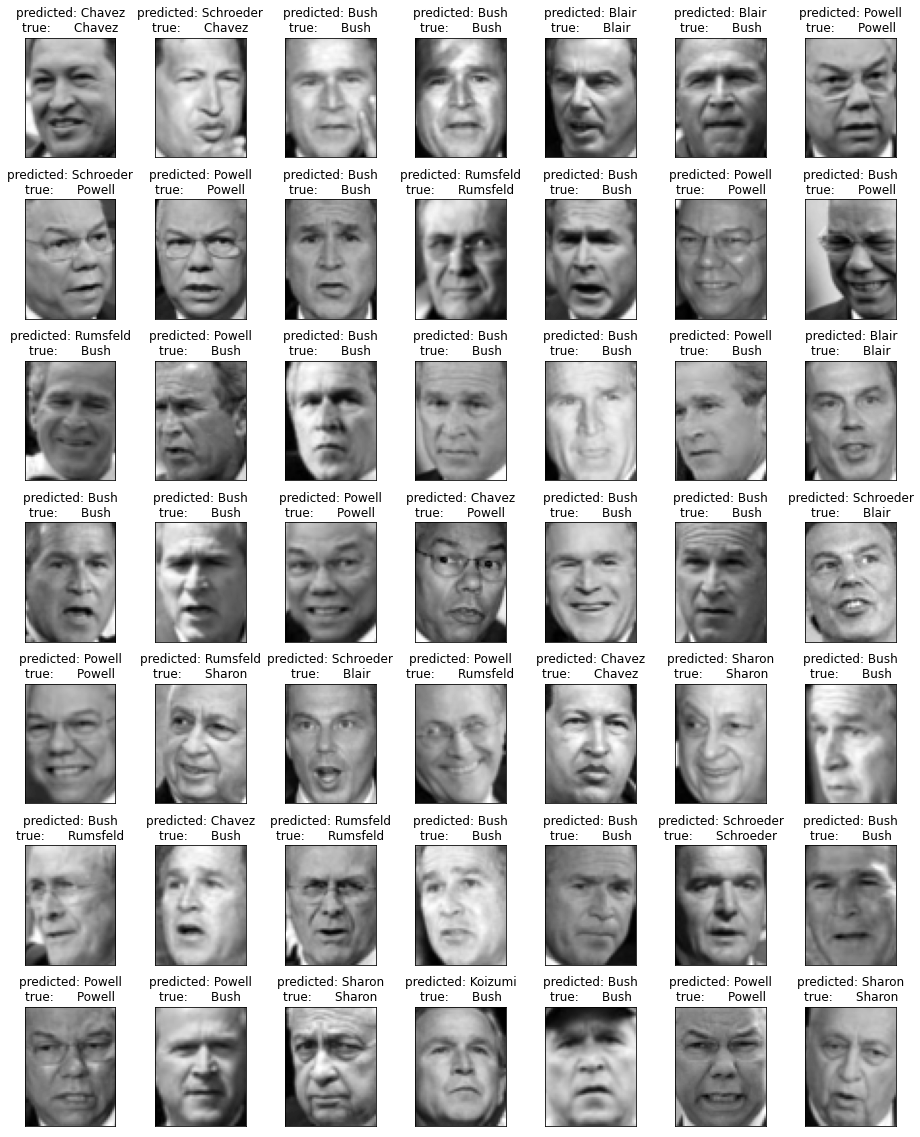

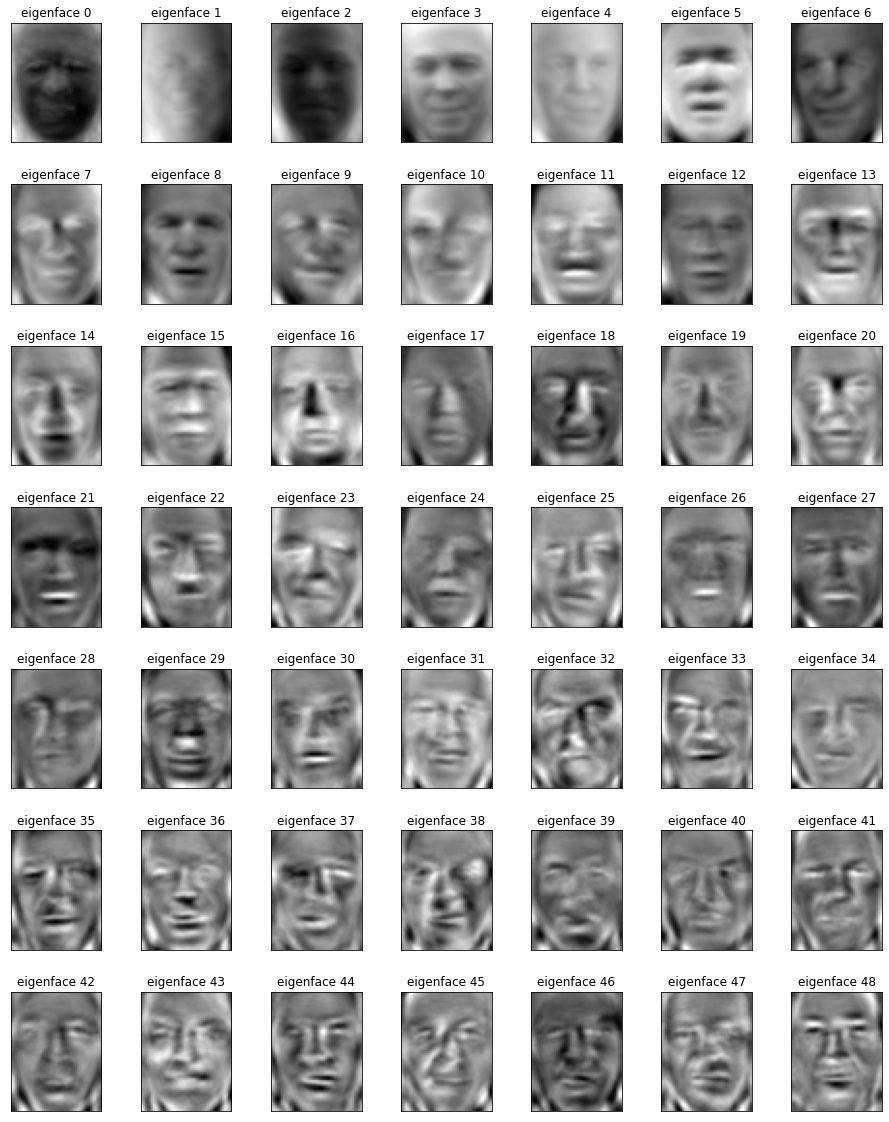

In [67]:
n_components=120
pca = PCA(n_components=n_components).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'var_smoothing': [1e-14, 1e-13, 1e-12, 1e-11]}
model = GridSearchCV(GaussianNB(),param_grid).fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print()
print("-----------------------------------------------------------------")
print()
print("Mejor estimador: ")
print(model.best_estimator_)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w, n_row=5, n_col=5)


eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)
plt.show()


param_grid = {'penalty':['l1','l2'],'C': [1e3, 5e3, 1e4, 5e4]}

model = GridSearchCV(LogisticRegression(),param_grid).fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print()
print("-----------------------------------------------------------------")
print()
print("Mejor estimador: ")
print(model.best_estimator_)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w, n_row=7, n_col=7)


eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=7, n_col=7)
plt.show()

0.9330492


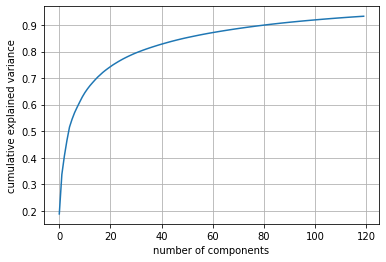

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.sum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

n_components=120, esta cantidad de componentes aportan el 93% de la desviación

**Gaussian:** GaussianNB(priors=None, var_smoothing=1e-14), con un **accuracy** de 78%

**LogisticRegresion:** LogisticRegression(C=5000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), con un **accuracy** de 70%

**Para sintetizar**, los eigenfaces reducen la dimensionalidad al permitir que el conjunto de datos más pequeños represente las imágenes de entrenamiento originales, logrando así una considerable reducción en el cómputo en el face recognition, estos eigenfaces representan las imágenes de los rostros con la intensidad lumínica de estos, resaltando así la forma del rostro según la intesidad lumínica que estos están generando, pero no se logra percibir cambio alguno cuando se hizo la transición de 30-120 componentes principales.

También se logró percibir que se obtienen distintos resultados dependiendo de la cantidad de componentes que se usan y también del tipo de clasificador y los diferentes parámetros que puedan tener estos. 

## Conclusiones

*  Aunque la características es una parte fundamental para lograr realizar un aprendizaje automático y que este pueda clasificar de la mejor manera, es importante recalcar que es posible que se tengan muchas características que no aporten información y estas generan un costo computacional innecesario.

* Determinar las emociones de una persona es algo muy complejo, ya que las personas de por sí cambian muy drásticamente y además cada persona no reacciona igual o los estímulos o interpreta las mismas sensaciones, por lo cual si se busca hacer un estudio de esto, lo ideal sería tener una enorme cantidad de muestras para poder ver alguna tendencia.

* Cuando un sistema está sobre ajustado dificulta el poder encontrar alguna tendencia, ya que una etiqueta opacaría al resto de las etiquetas, lo ideal sería que todas las etiquetas tengan más o menos la misma cantidad.

* Hay muchos parámetros que pueden mejorar o no el rendimiento del sistema, como es la cantidad de componentes a usar, el tipo de clasificador, los diferentes parámetros de los clasificadores e incluso también los datos que se usaran para el entrenamiento del sistema, por lo tanto, es ideal evaluar el sistema con diferentes parámetros para ver con cuál se puede obtener un mejor rendimiento.

* No hay un clasificador ideal el cual nos genere siempre un mejor resultado, esto depende de la distribución de los datos

* PCA es una gran herramienta que nos ayuda a reducir la dimensionalidad de un conjunto de datos, evitando que haya un sobredimensionamiento (Más características que muestras), generando así un menor trabajo computacional a la hora de procesar estos datos, además, de poder obtener mejores resultados ya que se trabaja con los componentes que generan la mayor información.